# Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
import numpy as np
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import confusion_matrix,recall_score,precision_score,f1_score,classification_report,accuracy_score, roc_auc_score, roc_curve
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import fbeta_score

# Importing the Dataset

In [2]:
df=pd.read_csv(r"C:\Users\Lenovo\Desktop\Data.csv")
df

,Unnamed: 0,radius1,perimeter1,area1,smoothness1,concave_points1,symmetry1,fractal_dimension1,radius2,texture2,perimeter2,symmetry2,texture3,area3,smoothness3,compactness3,concave_points3,symmetry3,Diagnosis
0,0,0.608005,0.673480,0.548034,0.749296,0.906961,0.875524,0.880551,0.891255,0.236609,0.965721,0.641079,0.172571,0.767790,0.678257,0.935673,0.909293,0.949937,1.0
1,1,0.760316,0.764834,0.762470,0.298029,0.426593,0.451049,0.205513,0.391482,0.162210,0.325647,0.173903,0.370166,0.740848,0.356514,0.225707,0.627960,0.370776,1.0
2,2,0.708365,0.738603,0.681314,0.631318,0.787072,0.630769,0.307198,0.574626,0.185216,0.472010,0.423121,0.439064,0.635221,0.529116,0.578319,0.829925,0.640801,1.0
3,3,0.220143,0.264472,0.142320,0.457253,0.645328,1.000000,0.391622,0.348074,0.345429,0.331443,0.359837,0.470588,0.147152,0.432128,0.332234,0.881302,0.420218,1.0
4,4,0.743787,0.784732,0.743336,0.506636,0.639708,0.448951,0.271669,0.585138,0.182785,0.577189,0.280132,0.151121,0.577917,0.470465,0.252979,0.544694,0.250000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
551,551,0.780979,0.856187,0.776326,0.635340,0.908834,0.686713,0.576723,0.770911,0.289001,0.986560,0.367257,0.565161,0.682261,0.498115,0.569574,0.869609,0.426783,1.0
552,552,0.818761,0.847142,0.863420,0.650087,0.855758,0.390909,0.192037,0.964658,0.388836,0.852774,0.094304,0.467338,0.771211,0.500628,0.262317,0.754100,0.154881,1.0
553,553,0.734341,0.749457,0.719583,0.473120,0.599808,0.409091,0.164472,0.592660,0.912753,0.548212,0.321234,0.852454,0.644629,0.296188,0.234007,0.545757,0.315081,1.0
554,554,0.525946,0.542330,0.453748,0.295482,0.319504,0.295804,0.199694,0.312551,0.310270,0.328977,0.153352,0.718232,0.385050,0.273565,0.407719,0.471349,0.204318,1.0


# Descriptive Analysis

In [3]:
df=df.drop("Unnamed: 0", axis=1)

In [4]:
X=df.drop("Diagnosis", axis=1)
X

,radius1,perimeter1,area1,smoothness1,concave_points1,symmetry1,fractal_dimension1,radius2,texture2,perimeter2,symmetry2,texture3,area3,smoothness3,compactness3,concave_points3,symmetry3
0,0.608005,0.673480,0.548034,0.749296,0.906961,0.875524,0.880551,0.891255,0.236609,0.965721,0.641079,0.172571,0.767790,0.678257,0.935673,0.909293,0.949937
1,0.760316,0.764834,0.762470,0.298029,0.426593,0.451049,0.205513,0.391482,0.162210,0.325647,0.173903,0.370166,0.740848,0.356514,0.225707,0.627960,0.370776
2,0.708365,0.738603,0.681314,0.631318,0.787072,0.630769,0.307198,0.574626,0.185216,0.472010,0.423121,0.439064,0.635221,0.529116,0.578319,0.829925,0.640801
3,0.220143,0.264472,0.142320,0.457253,0.645328,1.000000,0.391622,0.348074,0.345429,0.331443,0.359837,0.470588,0.147152,0.432128,0.332234,0.881302,0.420218
4,0.743787,0.784732,0.743336,0.506636,0.639708,0.448951,0.271669,0.585138,0.182785,0.577189,0.280132,0.151121,0.577917,0.470465,0.252979,0.544694,0.250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
551,0.780979,0.856187,0.776326,0.635340,0.908834,0.686713,0.576723,0.770911,0.289001,0.986560,0.367257,0.565161,0.682261,0.498115,0.569574,0.869609,0.426783
552,0.818761,0.847142,0.863420,0.650087,0.855758,0.390909,0.192037,0.964658,0.388836,0.852774,0.094304,0.467338,0.771211,0.500628,0.262317,0.754100,0.154881
553,0.734341,0.749457,0.719583,0.473120,0.599808,0.409091,0.164472,0.592660,0.912753,0.548212,0.321234,0.852454,0.644629,0.296188,0.234007,0.545757,0.315081
554,0.525946,0.542330,0.453748,0.295482,0.319504,0.295804,0.199694,0.312551,0.310270,0.328977,0.153352,0.718232,0.385050,0.273565,0.407719,0.471349,0.204318


In [5]:
y = df["Diagnosis"]
y

0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
551    1.0
552    1.0
553    1.0
554    1.0
555    1.0
Name: Diagnosis, Length: 556, dtype: float64

## Histogram

In [6]:
counts = df["Diagnosis"].value_counts()
counts

Diagnosis
0.0    344
1.0    212
Name: count, dtype: int64

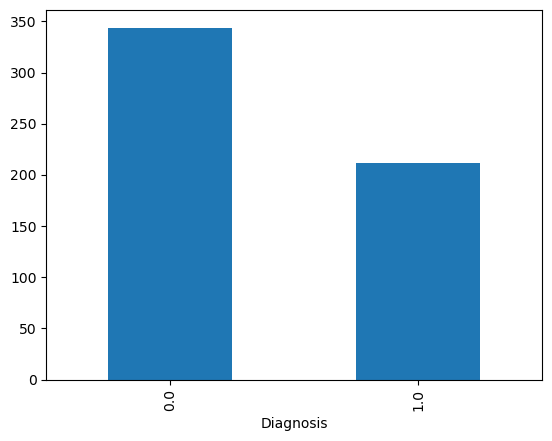

In [7]:
counts.plot(kind="bar")
plt.show()

# Train Test Split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=4)

# Handling Data Imbalancing

## Oversampling

In [9]:
y_train_discrete = np.where(y_train > 0, 1, 0)

sm = SMOTE(random_state=2)

print("\nClass 1 before Over Sampling --> ", sum(y_train_discrete == 1))
print("\nClass 0 before Over Sampling --> ", sum(y_train_discrete == 0))

X_train_OS, y_train_OS = sm.fit_resample(X_train, y_train_discrete)

print("\nThe shape of X after Over Sampling -->", X_train_OS.shape)
print("\nThe shape of Y after Over Sampling -->", y_train_OS.shape)

print("\nClass 1 after Over Sampling --> ", sum(y_train_OS == 1))
print("\nClass 0 after Over Sampling --> ", sum(y_train_OS == 0))
print("\n")


Class 1 before Over Sampling -->  127

Class 0 before Over Sampling -->  206

The shape of X after Over Sampling --> (412, 17)

The shape of Y after Over Sampling --> (412,)

Class 1 after Over Sampling -->  206

Class 0 after Over Sampling -->  206




# K_Means Method

In [10]:
k_means = KMeans(n_clusters=2, init='k-means++', n_init=12)

In [11]:
k_means.fit(X_train_OS)

KMeans(n_clusters=2, n_init=12)

In [12]:
k_means_labels=k_means.labels_
k_means_labels

array([0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,

In [13]:
k_means_cluster_centers= k_means.cluster_centers_
k_means_cluster_centers

array([[0.27711926, 0.28360241, 0.2054537 , 0.4057418 , 0.1640564 ,
        0.39778269, 0.37464976, 0.16726199, 0.36876769, 0.16217431,
        0.34894233, 0.39592396, 0.15606799, 0.37401827, 0.23259601,
        0.25380919, 0.35565212],
       [0.55953043, 0.5814711 , 0.49750104, 0.56118571, 0.53445277,
        0.56874718, 0.42569463, 0.41691638, 0.36695005, 0.40133235,
        0.33357755, 0.5588771 , 0.46339273, 0.53265123, 0.48625087,
        0.63179293, 0.53048666]])

# RBF Method

In [14]:
# Perform K-Means clustering
cluster_centers =k_means_cluster_centers
k_means_labels = k_means_labels  

# Use the RBF kernel to create a classification model
kernel = 1.0 * RBF(1.0)
model = GaussianProcessClassifier(kernel=kernel)
model.fit(X_train_OS, k_means_labels) 

# Predict labels for the test set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate confusion matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", confusion_matrix)

Accuracy: 0.9506726457399103
Confusion Matrix:
 [[137   1]
 [ 10  75]]


# Sensitivity

In [15]:
print(' Sensitivity :', recall_score(y_test, y_pred))

 Sensitivity : 0.8823529411764706


# precision, recall, f1-score,support

In [16]:
print (classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.93      0.99      0.96       138
         1.0       0.99      0.88      0.93        85

    accuracy                           0.95       223
   macro avg       0.96      0.94      0.95       223
weighted avg       0.95      0.95      0.95       223



# f2_score

In [17]:
f2_score = fbeta_score(y_test, y_pred, beta=2, average='macro')

print("F2-score:", f2_score)

F2-score: 0.9407068476945086


# MCC

In [18]:
mcc = matthews_corrcoef(y_test,  y_pred)

print("Matthews Correlation Coefficient:", mcc)

Matthews Correlation Coefficient: 0.8966944549327335
